In [12]:
# Step 1: Data Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("housing_price_dataset.csv")

# Display basic information
print(data.info())

# Check for missing values
missing_counts = data.isnull().sum()
print("\nMissing values:\n", missing_counts)

# Remove rows with missing values
cleaned_data = data.dropna()

# Summary of cleaning
print(f"\nOriginal data shape: {data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None

Missing values:
 SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Original data shape: (50000, 6)
Cleaned data shape: (50000, 6)


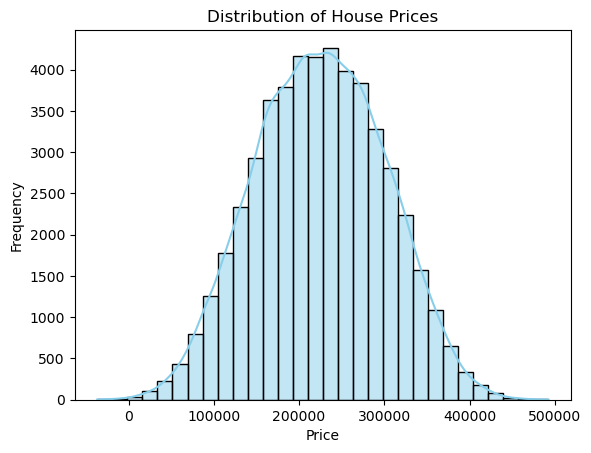

In [13]:
sns.histplot(cleaned_data["Price"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Step 2: Feature Selection
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variable Neighborhood
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
neighborhood_encoded = encoder.fit_transform(cleaned_data[["Neighborhood"]])
neighborhood_df = pd.DataFrame(neighborhood_encoded, columns=encoder.get_feature_names_out(["Neighborhood"]))

# Combine encoded features with numerical features
X = pd.concat([cleaned_data[["SquareFeet", "Bedrooms", "Bathrooms", "YearBuilt"]], neighborhood_df], axis=1)
y = cleaned_data["Price"]

In [16]:
# Step 3: Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 2436249371.31
R-squared: 0.58


C:\Users\19128\AppData\Local\Temp\ipykernel_18048\2213289509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="coolwarm")


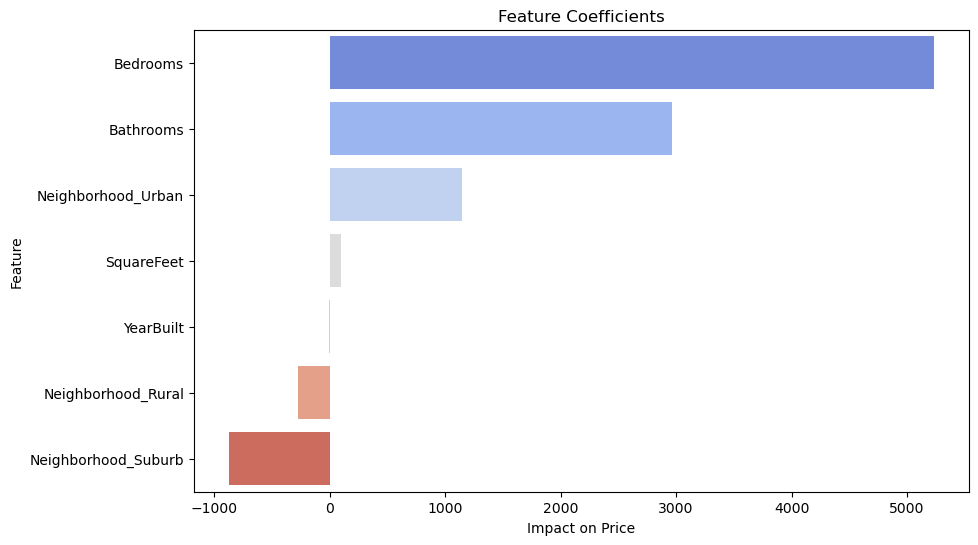

In [17]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Feature Coefficients")
plt.xlabel("Impact on Price")
plt.ylabel("Feature")
plt.show()


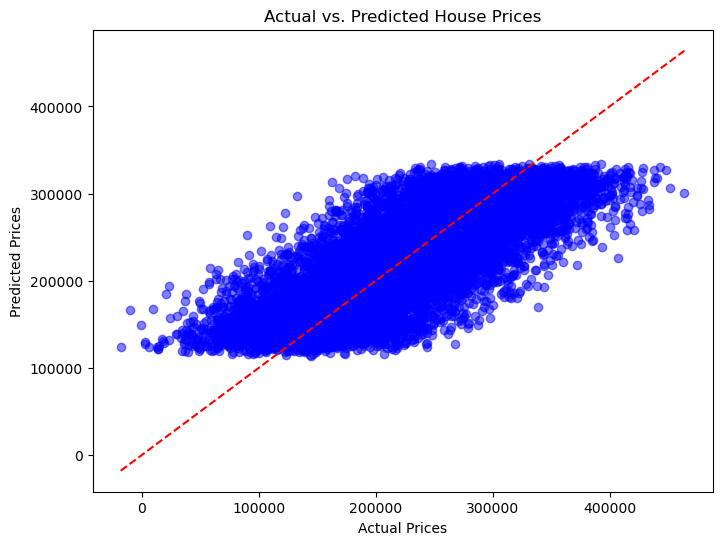

In [18]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()
